# Human Body Hacking

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploración de los datos

In [2]:
df = pd.read_csv('data/train.csv')

In [7]:
df.shape

(351, 10)

In [3]:
df.head(10)

,id,organ,data_source,img_height,img_width,pixel_size,tissue_thickness,rle,age,sex
0,10044,prostate,HPA,3000,3000,0.4,4,1459676 77 1462675 82 1465674 87 1468673 92 14...,37.0,Male
1,10274,prostate,HPA,3000,3000,0.4,4,715707 2 718705 8 721703 11 724701 18 727692 3...,76.0,Male
2,10392,spleen,HPA,3000,3000,0.4,4,1228631 20 1231629 24 1234624 40 1237623 47 12...,82.0,Male
3,10488,lung,HPA,3000,3000,0.4,4,3446519 15 3449517 17 3452514 20 3455510 24 34...,78.0,Male
4,10610,spleen,HPA,3000,3000,0.4,4,478925 68 481909 87 484893 105 487863 154 4908...,21.0,Female
5,10611,kidney,HPA,3000,3000,0.4,4,730193 18 733191 25 736191 25 739152 65 742149...,68.0,Female
6,10651,largeintestine,HPA,3000,3000,0.4,4,1240229 12 1243227 15 1246223 26 1249221 29 12...,83.0,Male
7,10666,prostate,HPA,3000,3000,0.4,4,2698231 7 2701231 7 2704226 16 2707221 25 2710...,57.0,Male
8,10703,spleen,HPA,3000,3000,0.4,4,811259 262 814258 264 817257 266 820256 267 82...,50.0,Female
9,10892,largeintestine,HPA,3000,3000,0.4,4,523786 3 526784 8 529782 8 532778 9 535642 25 ...,79.0,Female


In [4]:
def different_values(column: str) -> pd.Series: # take unique values from the dataframe
    return df[column].value_counts()

In [6]:
for col in df.columns:
    print(f"{col}: {different_values(col).shape[0]} unique values")

id: 351 unique values
organ: 5 unique values
data_source: 1 unique values
img_height: 20 unique values
img_width: 20 unique values
pixel_size: 1 unique values
tissue_thickness: 1 unique values
rle: 351 unique values
age: 28 unique values
sex: 2 unique values


In [8]:
def get_types(column: str) -> pd.Series:
    return df[column].dtype

In [10]:
for col in df.columns:
    print(f"{col}: {get_types(col)}")

id: int64
organ: object
data_source: object
img_height: int64
img_width: int64
pixel_size: float64
tissue_thickness: int64
rle: object
age: float64
sex: object


In [11]:
def count_missing_values(column: str) -> int:
    return df[column].isnull().sum()

In [12]:
for col in df.columns:
    print(f"{col}: {count_missing_values(col)} missing values")

id: 0 missing values
organ: 0 missing values
data_source: 0 missing values
img_height: 0 missing values
img_width: 0 missing values
pixel_size: 0 missing values
tissue_thickness: 0 missing values
rle: 0 missing values
age: 0 missing values
sex: 0 missing values


### Preprocessing

In [19]:
def fill_missing_values(column: str, value: str | int | float) -> None:
    df[column].fillna(value, inplace=True) # fill missing values

In [14]:
def get_median(column: str) -> float:
    return df[column].median()

In [20]:
for col in df.columns: # fill nulls on categorical values
    if col == "organ":
        fill_missing_values(col, "unknown")
    elif col == "data_source":
        fill_missing_values(col, "unknown")
    elif col == "sex":
        fill_missing_values(col, "unknown")
    else:
        pass

C:\Users\lpmon\AppData\Local\Temp\ipykernel_28372\1197734091.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value, inplace=True) # fill missing values


In [21]:
for col in df.columns:
    if col == "img_height":
        fill_missing_values(col, get_median(col))
    elif col == "img_width":
        fill_missing_values(col, get_median(col))
    elif col == "age":
        fill_missing_values(col, get_median(col))  
    elif col == "pixel_size":
        fill_missing_values(col, get_median(col))
    elif col == "rle":
        fill_missing_values(col, 0) # no mask
    else:
        pass

C:\Users\lpmon\AppData\Local\Temp\ipykernel_28372\1197734091.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value, inplace=True) # fill missing values
C:\Users\lpmon\AppData\Local\Temp\ipykernel_28372\1197734091.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

### Graphs

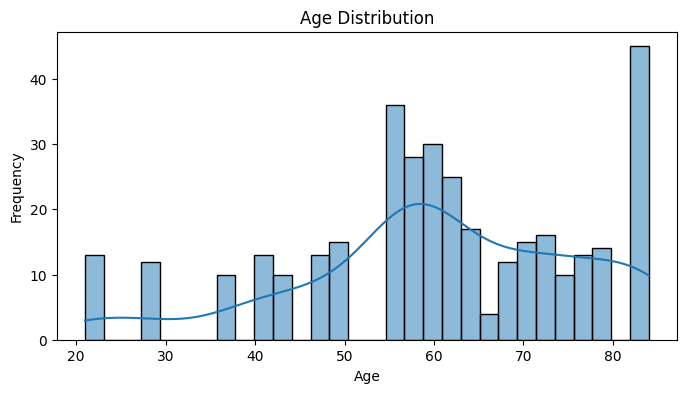

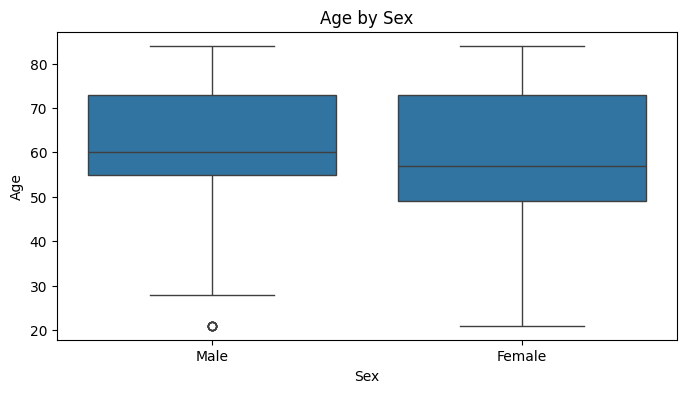

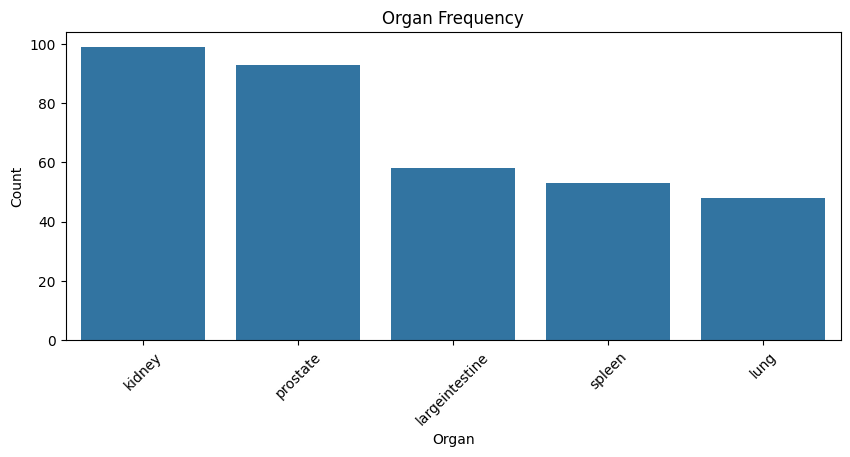

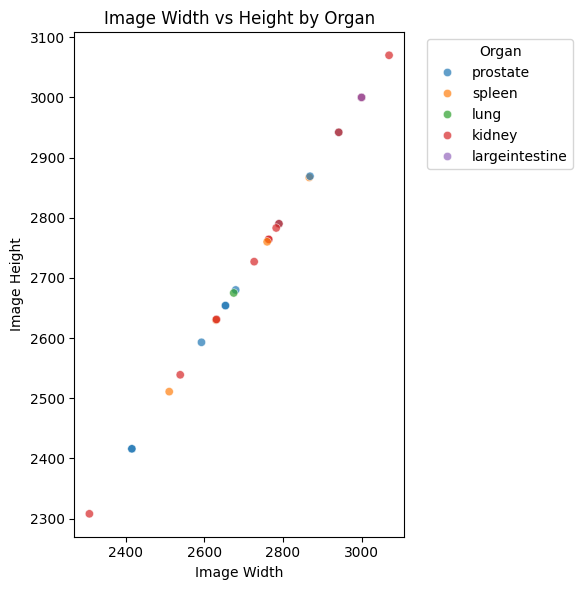

In [ ]:

plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(8,4))
sns.boxplot(x='sex', y='age', data=df)
plt.title('Age by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()


plt.figure(figsize=(10,4))
sns.countplot(x='organ', data=df, order=df['organ'].value_counts().index)
plt.title('Organ Frequency')
plt.xlabel('Organ')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(6,6))
sns.scatterplot(x='img_width', y='img_height', data=df, hue='organ', alpha=0.7)
plt.title('Image Width vs Height by Organ')
plt.xlabel('Image Width')
plt.ylabel('Image Height')
plt.legend(title='Organ', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

,count,mean,std,min,25%,50%,75%,max
id,351.0,16662.914530,9.863946e+03,62.0,8229.0,16609.0,25630.5,32741.0
img_height,351.0,2978.364672,9.096209e+01,2308.0,3000.0,3000.0,3000.0,3070.0
img_width,351.0,2978.364672,9.096209e+01,2308.0,3000.0,3000.0,3000.0,3070.0
pixel_size,351.0,0.400000,1.111808e-16,0.4,0.4,0.4,0.4,0.4
tissue_thickness,351.0,4.000000,0.000000e+00,4.0,4.0,4.0,4.0,4.0
age,351.0,60.364672,1.601333e+01,21.0,55.0,60.0,73.0,84.0


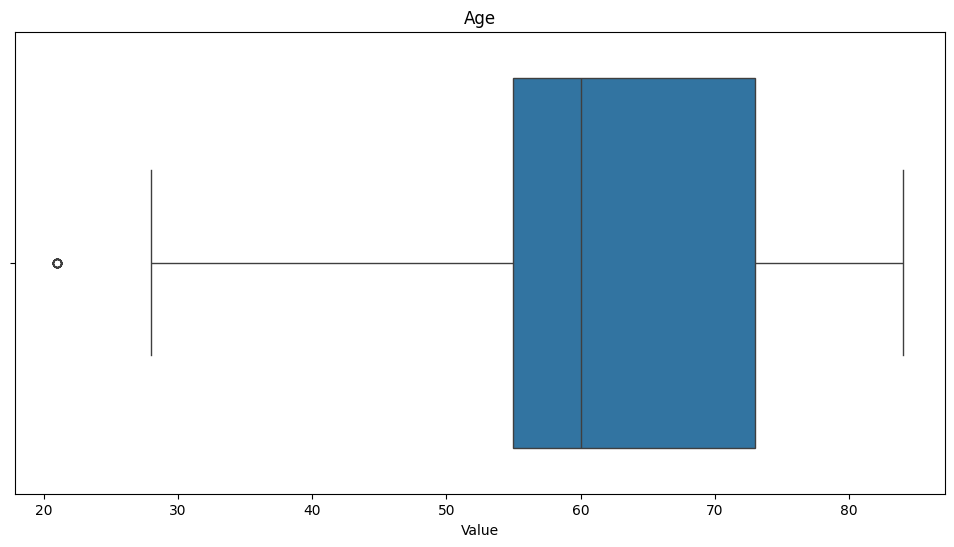

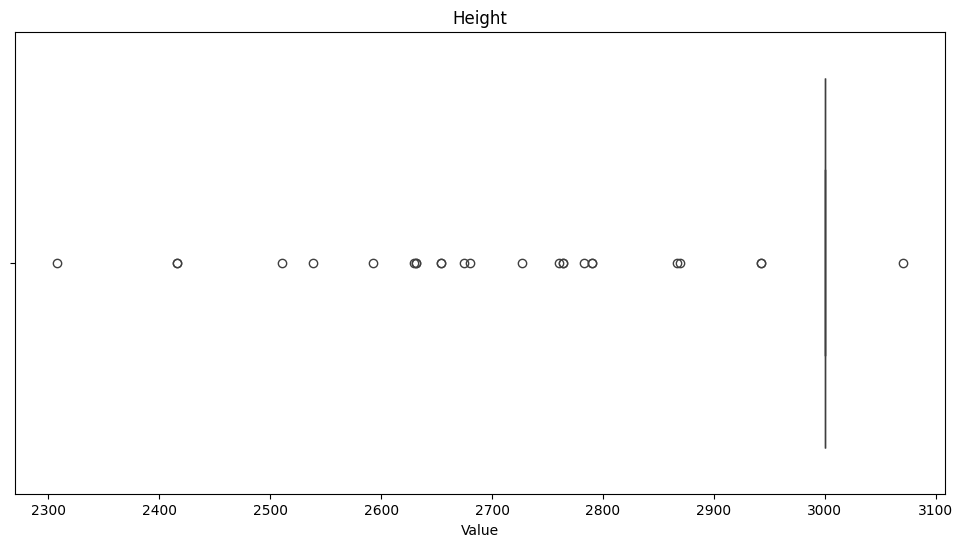

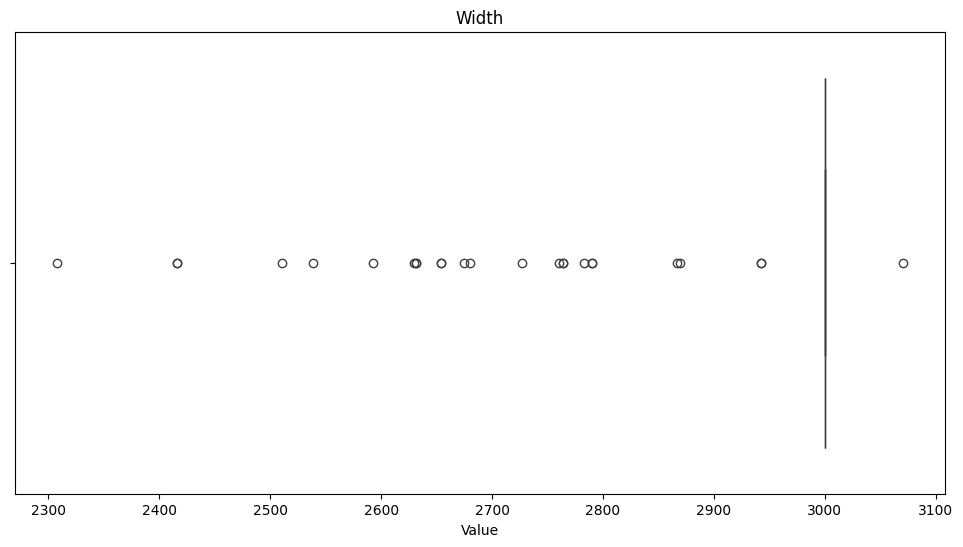

KeyError: 'tissue_thichness'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Summary statistics for numerical columns
numerical_summary = df.describe().T  # Transpose for easier reading
display(numerical_summary)



plt.figure(figsize=(12,6))
sns.boxplot(data=df['age'], orient='h')
plt.title('Age')
plt.xlabel('Value')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df['img_height'], orient='h')
plt.title('Height')
plt.xlabel('Value')
plt.show()


plt.figure(figsize=(12,6))
sns.boxplot(data=df['img_width'], orient='h')
plt.title('Width')
plt.xlabel('Value')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df['tissue_thickness'], orient='h')
plt.title('Tissue Thickness')
plt.xlabel('Value')
plt.show()

Como podemos observar, existe una mayor cantidad de fotos de FTUs de riñones que de otro tipo de órgano. Seguido por imágenes de próstata, intestino largo, bazo y finalmente el pulmón. 
Respecto a las edades, podemos ver que la mayoría son personas ya mayores, rondando mayoritariamente los 60 años en adelante. 